In [4]:
%matplotlib inline
import sys
sys.path.append('/Users/hazarapettunanyan/tensorflow_source/models/research/slim/')
sys.path.append('/Users/hazarapettunanyan/tensorflow_source/models/research/slim/datasets/')
sys.path.append('/Users/hazarapettunanyan/tensorflow_source/models/research/slim/nets/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import scipy
import scipy.misc
from scipy import ndimage

from datasets import dataset_utils

# the following directory should be in Python path
# in my case I launch it from ~/workspace/models/research/slim

In [3]:
from datasets import dataset_utils
import tensorflow as tf

url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"
checkpoints_dir = '/tmp/checkpoints'

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

>> Downloading vgg_16_2016_08_28.tar.gz 100.0%
Successfully downloaded vgg_16_2016_08_28.tar.gz 513324920 bytes.


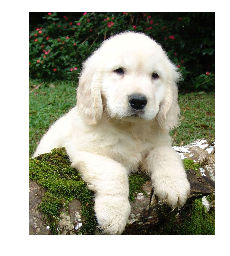

207
0.86728424
Probability 86.73% => [golden retriever]
257
0.04095087
Probability 4.10% => [Great Pyrenees]
219
0.031460702
Probability 3.15% => [cocker spaniel, English cocker spaniel, cocker]
222
0.01789871
Probability 1.79% => [kuvasz]
220
0.016068893
Probability 1.61% => [Sussex spaniel]


In [4]:
import numpy as np
import os
import tensorflow as tf

import matplotlib.image as mpimg

from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing

from tensorflow.contrib import slim

image_size = vgg.vgg_16.default_image_size

#url = 'https://upload.wikimedia.org/wikipedia/commons/d/d9/First_Student_IC_school_bus_202076.jpg'
#url = 'https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg'
    
# try using any image you like
img = mpimg.imread('/Users/Kuzmin/Desktop/Golde33443.jpg')
#img = mpimg.imread('/Users/Kuzmin/Desktop/First_Student_IC_school_bus_202076.jpg')

with tf.Graph().as_default():
    image = tf.convert_to_tensor(img)
    
    processed_image = vgg_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure the batch norm parameters.
    with slim.arg_scope(vgg.vgg_arg_scope()):
        # 1000 classes instead of 1001.
        logits, tensors_list = vgg.vgg_16(processed_images, num_classes=1000, is_training=False)
    probabilities = tf.nn.softmax(logits)
    
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
        slim.get_model_variables('vgg_16'))
    
    with tf.Session() as sess:
        init_fn(sess)
        np_image, probabilities = sess.run([image, probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
        
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.axis('off')
    plt.show()
    
    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        print index
        print probabilities[index]
        # Shift the index of a class name by one. 
        print('Probability %0.2f%% => [%s]' % (probabilities[index] * 100, names[index+1]))

In [9]:
# print 1000 ImageNet classes
for key in names.keys():
    print key,':',names[key]

0 : background
1 : tench, Tinca tinca
2 : goldfish, Carassius auratus
3 : great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
4 : tiger shark, Galeocerdo cuvieri
5 : hammerhead, hammerhead shark
6 : electric ray, crampfish, numbfish, torpedo
7 : stingray
8 : cock
9 : hen
10 : ostrich, Struthio camelus
11 : brambling, Fringilla montifringilla
12 : goldfinch, Carduelis carduelis
13 : house finch, linnet, Carpodacus mexicanus
14 : junco, snowbird
15 : indigo bunting, indigo finch, indigo bird, Passerina cyanea
16 : robin, American robin, Turdus migratorius
17 : bulbul
18 : jay
19 : magpie
20 : chickadee
21 : water ouzel, dipper
22 : kite
23 : bald eagle, American eagle, Haliaeetus leucocephalus
24 : vulture
25 : great grey owl, great gray owl, Strix nebulosa
26 : European fire salamander, Salamandra salamandra
27 : common newt, Triturus vulgaris
28 : eft
29 : spotted salamander, Ambystoma maculatum
30 : axolotl, mud puppy, Ambystoma mexicanum
31 : bullfrog,

In [7]:
for key in tensors_list.keys():
    print tensors_list[key]

Tensor("vgg_16/conv1/conv1_1/Relu:0", shape=(1, 224, 224, 64), dtype=float32)
Tensor("vgg_16/conv1/conv1_2/Relu:0", shape=(1, 224, 224, 64), dtype=float32)
Tensor("vgg_16/pool1/MaxPool:0", shape=(1, 112, 112, 64), dtype=float32)
Tensor("vgg_16/conv2/conv2_1/Relu:0", shape=(1, 112, 112, 128), dtype=float32)
Tensor("vgg_16/conv2/conv2_2/Relu:0", shape=(1, 112, 112, 128), dtype=float32)
Tensor("vgg_16/pool2/MaxPool:0", shape=(1, 56, 56, 128), dtype=float32)
Tensor("vgg_16/conv3/conv3_1/Relu:0", shape=(1, 56, 56, 256), dtype=float32)
Tensor("vgg_16/conv3/conv3_2/Relu:0", shape=(1, 56, 56, 256), dtype=float32)
Tensor("vgg_16/conv3/conv3_3/Relu:0", shape=(1, 56, 56, 256), dtype=float32)
Tensor("vgg_16/pool3/MaxPool:0", shape=(1, 28, 28, 256), dtype=float32)
Tensor("vgg_16/conv4/conv4_1/Relu:0", shape=(1, 28, 28, 512), dtype=float32)
Tensor("vgg_16/conv4/conv4_2/Relu:0", shape=(1, 28, 28, 512), dtype=float32)
Tensor("vgg_16/conv4/conv4_3/Relu:0", shape=(1, 28, 28, 512), dtype=float32)
Tensor(